<a href="https://colab.research.google.com/github/ibudeX/Bank-Loan-EDA-and-Prediction/blob/main/Bank_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import kagglehub

from sklearn.model_selection import train_test_split

## Reading Data

### 1.

In [ ]:
# Download latest version
path = kagglehub.dataset_download("udaymalviya/bank-loan-data")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/udaymalviya/bank-loan-data/versions/1


### 2.

In [ ]:
os.listdir(path)

['loan_data.csv']

In [ ]:
data = pd.read_csv(os.path.join(path, 'loan_data.csv'))
data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


## Exploratory Data Analysis

### info : gives information about the data. , basic information.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [ ]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

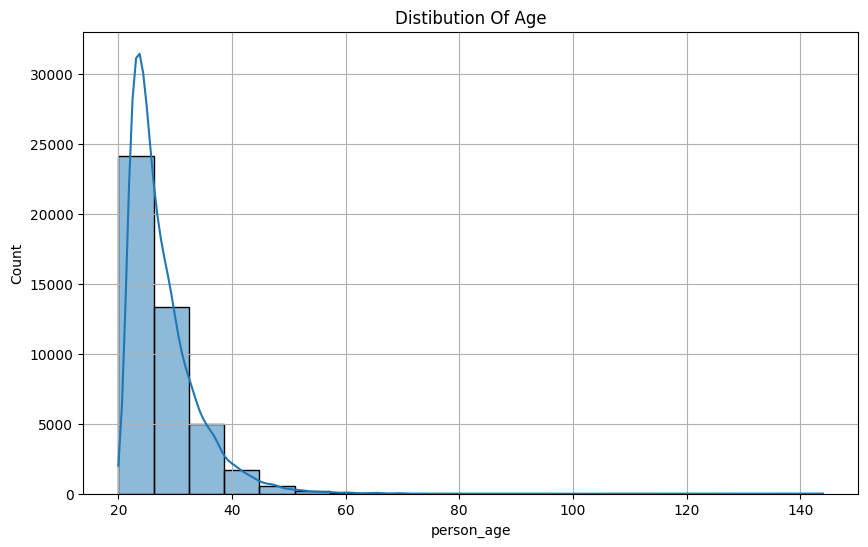

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['person_age'], bins=20, kde=True)
plt.title("Distibution Of Age")
plt.grid(True)
plt.show()

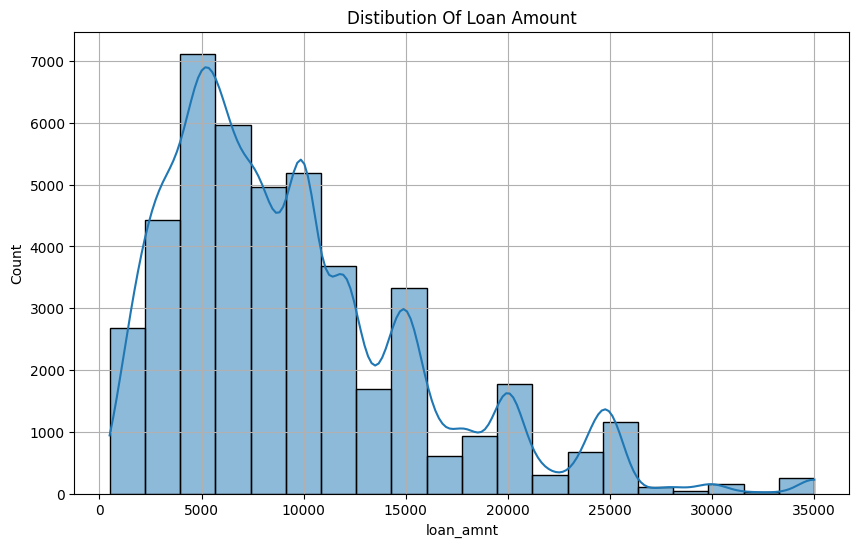

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data['loan_amnt'], bins=20, kde=True)
plt.title("Distibution Of Loan Amount")
plt.grid(True)
plt.show()

In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No


In [ ]:
X.dtypes

,0
person_age,float64
person_gender,object
person_education,object
person_income,float64
person_emp_exp,int64
person_home_ownership,object
loan_amnt,float64
loan_intent,object
loan_int_rate,float64
loan_percent_income,float64


In [ ]:
object_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

# use pandas get dummies to encode data
X = pd.get_dummies(X, columns=object_cols)

In [ ]:
X

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,person_gender_female,person_gender_male,...,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
0,22.0,71948.0,0,35000.0,16.02,0.49,3.0,561,True,False,...,False,True,False,False,False,False,True,False,True,False
1,21.0,12282.0,0,1000.0,11.14,0.08,2.0,504,True,False,...,True,False,False,True,False,False,False,False,False,True
2,25.0,12438.0,3,5500.0,12.87,0.44,3.0,635,True,False,...,False,False,False,False,False,True,False,False,True,False
3,23.0,79753.0,0,35000.0,15.23,0.44,2.0,675,True,False,...,False,True,False,False,False,True,False,False,True,False
4,24.0,66135.0,1,35000.0,14.27,0.53,4.0,586,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,47971.0,6,15000.0,15.66,0.31,3.0,645,False,True,...,False,True,False,False,False,True,False,False,True,False
44996,37.0,65800.0,17,9000.0,14.07,0.14,11.0,621,True,False,...,False,True,False,False,True,False,False,False,True,False
44997,33.0,56942.0,7,2771.0,10.02,0.05,10.0,668,False,True,...,False,True,True,False,False,False,False,False,True,False
44998,29.0,33164.0,4,12000.0,13.23,0.36,6.0,604,False,True,...,False,True,False,True,False,False,False,False,True,False


In [ ]:
y

,loan_status
0,1
1,0
2,1
3,1
4,1
...,...
44995,1
44996,1
44997,1
44998,1


In [ ]:
my_model = RandomForestClassifier()

In [ ]:
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
my_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
my_model.score(X_test, y_test)

0.9293333333333333

In [ ]:
predictions = my_model.predict(X_test)

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000

